# I. Introduction

Time series analysis is a statistical method used to analyze data points collected or recorded at successive points in time. Unlike cross-sectional data, which considers observations at a single point in time, time series data focuses on how data changes over intervals. The main goal of time series analysis is to identify patterns such as trends, seasonal variations, and cyclical behaviors to model the underlying process and make future predictions (Hyndman & Athanasopoulos, 2018). By accounting for temporal dependencies in the data, time series models can help businesses and researchers understand past behaviors and forecast future values.

Stationarity is a fundamental concept in time series analysis. A time series is said to be stationary if its statistical properties, such as mean, variance, and autocorrelation, remain constant over time. Stationarity is crucial because many time series models, including Autoregressive Moving Average (ARMA) and Autoregressive Integrated Moving Average (ARIMA), assume that the underlying time series is stationary. Non-stationary data can lead to unreliable and biased forecasts, which may compromise decision-making processes. To ensure stationarity, techniques such as differencing, detrending, or transformation can be applied (Hamilton, 1994).

Time series analysis is highly valuable for business intelligence as it enables organizations to make data-driven decisions by predicting future trends based on historical patterns. For example, businesses can use time series models to forecast sales, optimize inventory levels, and manage supply chains effectively. By understanding and anticipating changes in demand, companies can reduce costs, improve customer satisfaction, and enhance overall operational efficiency (Chatfield, 2004).

# II. Description of the Problem Situation

The challenge for Arca Continental Coca-Cola is to accurately predict the demand for Coca-Cola products in the Guadalajara Metropolitan Area, ensuring that supply levels align with consumer demand. As a leading bottling company in Latin America, Arca Continental must manage its supply chain effectively to maintain an adequate stock of products while minimizing costs and maximizing customer satisfaction. The goal is to develop a robust time series predictive model to forecast sales volumes at an aggregate level and for the main brands in the Guadalajara Metropolitan Area.

To address this problem, the analysis will begin with an assessment of the stationarity of the time series data using the Augmented Dickey-Fuller (ADF) test. Once stationarity is confirmed or achieved, various models such as ARMA, ARIMA, and Seasonal ARIMA (SARIMA) will be considered to capture the data's underlying patterns. For scenarios with multiple interdependent time series, a Vector Autoregression (VAR) model will be applied, supported by the Granger causality test to identify causal relationships between variables. Autocorrelation and partial autocorrelation analyses will help determine the appropriate lag structures for these models, enhancing their predictive power. By leveraging these techniques, the model aims to deliver accurate sales forecasts, enabling Arca Continental Coca-Cola to align production with anticipated demand and optimize its supply chain operations.

In [136]:
# loading required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller as adft
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.dates as mdates
import matplotlib.pylab as plt
from datetime import datetime
from matplotlib.pylab import rcParams
!pip install pmdarima --quiet
import pmdarima as pm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.api import qqplot
import statsmodels.api as sm

In [137]:
from google.colab import files
uploaded = files.upload()

Saving EvidenceFileCocaCola.xlsx to EvidenceFileCocaCola (1).xlsx


In [138]:
df = pd.read_excel('EvidenceFileCocaCola.xlsx')
df.head()

,tperiod,sales_unitboxes,consumer_sentiment,CPI,inflation_rate,unemp_rate,gdp_percapita,itaee,itaee_growth,pop_density,job_density,pop_minwage,exchange_rate,max_temperature,holiday_month
0,2015-01-01,5516689.143,38.062504,87.110103,-0.09,0.052303,11659.55571,103.765354,0.049717,98.541847,18.260479,9.657861,14.692586,28,0
1,2015-02-01,5387496.113,37.491143,87.275377,0.19,0.053113,11659.55423,103.765354,0.049717,98.541860,18.463294,9.657861,14.921342,31,0
2,2015-03-01,5886746.634,38.505219,87.630717,0.41,0.046088,11659.55275,103.765354,0.049717,98.541872,18.641639,9.657861,15.228338,29,0
3,2015-04-01,6389182.011,37.842864,87.403840,-0.26,0.051020,11625.74515,107.751835,0.031839,98.828431,18.678763,9.594919,15.226180,32,1
4,2015-05-01,6448274.629,38.031692,86.967366,-0.50,0.055174,11625.74368,107.751835,0.031839,98.828444,18.675393,9.594919,15.264470,34,0


In [139]:
# displaying time series plot
print(df.head()) # let’s display the beginning of the dataset
# print(ts_data.tail())
# df['Month'] = pd.to_datetime(df['Month'], format='%Y-%m')
# print(df.head())

     tperiod  sales_unitboxes  consumer_sentiment        CPI  inflation_rate  \
0 2015-01-01      5516689.143           38.062504  87.110103           -0.09   
1 2015-02-01      5387496.113           37.491143  87.275377            0.19   
2 2015-03-01      5886746.634           38.505219  87.630717            0.41   
3 2015-04-01      6389182.011           37.842864  87.403840           -0.26   
4 2015-05-01      6448274.629           38.031692  86.967366           -0.50   

   unemp_rate  gdp_percapita       itaee  itaee_growth  pop_density  \
0    0.052303    11659.55571  103.765354      0.049717    98.541847   
1    0.053113    11659.55423  103.765354      0.049717    98.541860   
2    0.046088    11659.55275  103.765354      0.049717    98.541872   
3    0.051020    11625.74515  107.751835      0.031839    98.828431   
4    0.055174    11625.74368  107.751835      0.031839    98.828444   

   job_density  pop_minwage  exchange_rate  max_temperature  holiday_month  
0    18.260479 

In [140]:
df.index = df['tperiod']
print(df.head())

              tperiod  sales_unitboxes  consumer_sentiment        CPI  \
tperiod                                                                 
2015-01-01 2015-01-01      5516689.143           38.062504  87.110103   
2015-02-01 2015-02-01      5387496.113           37.491143  87.275377   
2015-03-01 2015-03-01      5886746.634           38.505219  87.630717   
2015-04-01 2015-04-01      6389182.011           37.842864  87.403840   
2015-05-01 2015-05-01      6448274.629           38.031692  86.967366   

            inflation_rate  unemp_rate  gdp_percapita       itaee  \
tperiod                                                             
2015-01-01           -0.09    0.052303    11659.55571  103.765354   
2015-02-01            0.19    0.053113    11659.55423  103.765354   
2015-03-01            0.41    0.046088    11659.55275  103.765354   
2015-04-01           -0.26    0.051020    11625.74515  107.751835   
2015-05-01           -0.50    0.055174    11625.74368  107.751835   

    

# **III. Data and Methodology**

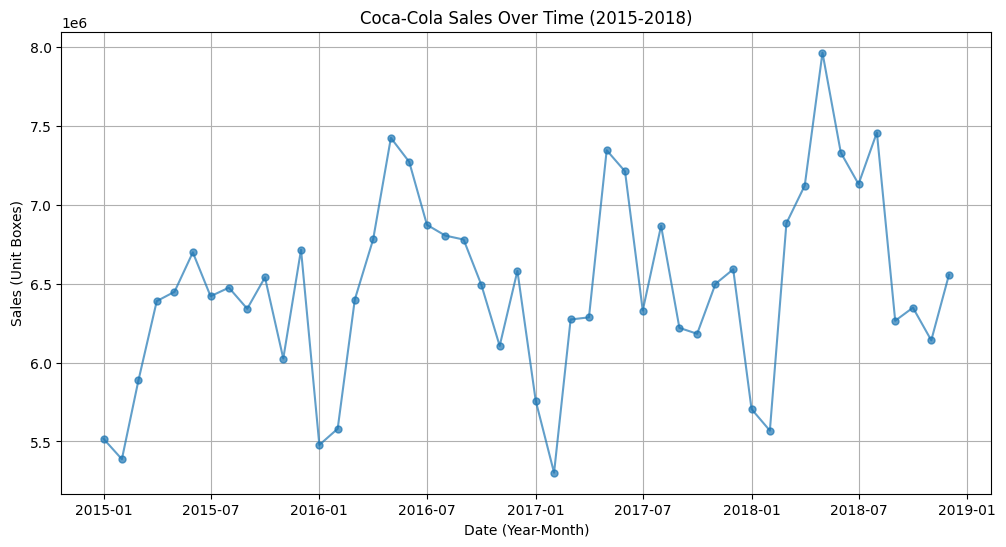

In [141]:
# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['sales_unitboxes'], marker='o', linestyle='-', markersize=5, alpha=0.7)
plt.title('Coca-Cola Sales Over Time (2015-2018)')
plt.xlabel('Date (Year-Month)')
plt.ylabel('Sales (Unit Boxes)')
plt.grid(True)
plt.show()

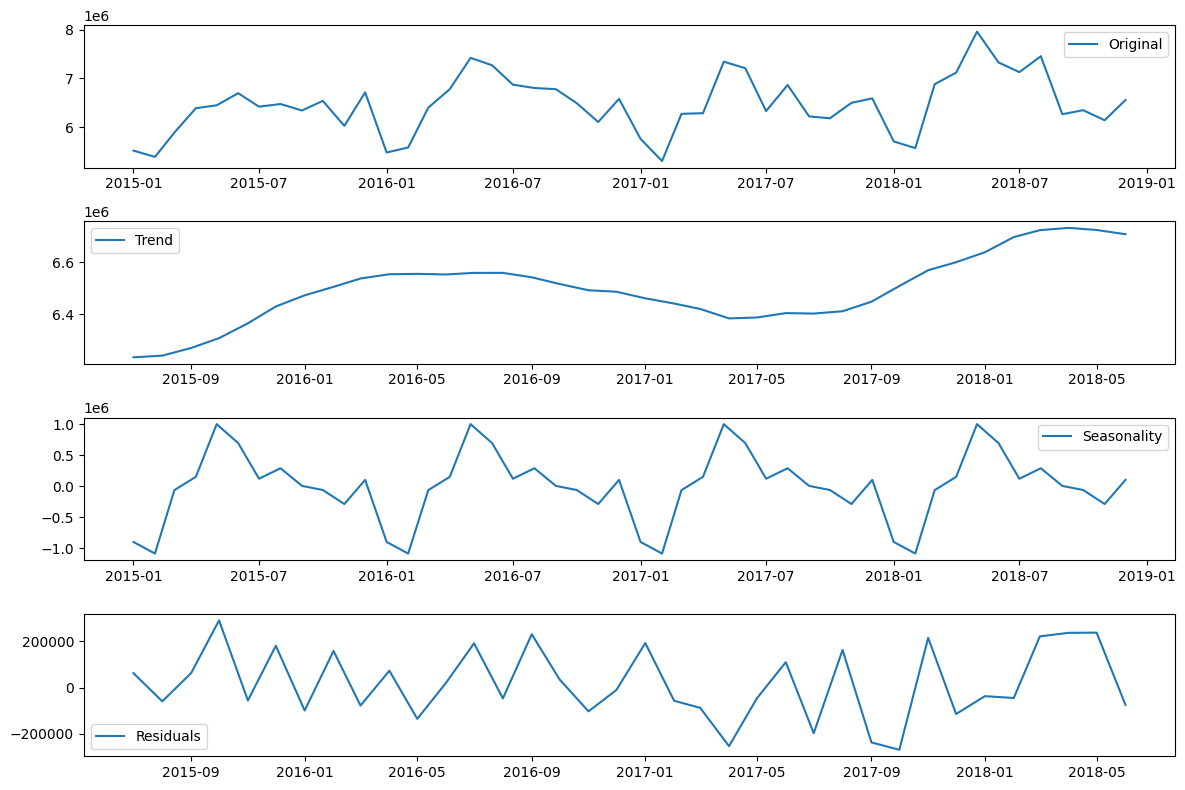

In [142]:
# Ensure 'tperiod' is in datetime format and set as index
df['tperiod'] = pd.to_datetime(df['tperiod'])
df.set_index('tperiod', inplace=True)

# Decompose the time series into trend, seasonal, and random components
decomposition = seasonal_decompose(df['sales_unitboxes'], model='additive', period=12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the decomposed components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(df['sales_unitboxes'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


In [144]:
from statsmodels.tsa.stattools import adfuller

# Detect the presence of stationarity using the Augmented Dickey-Fuller test
adf_test = adfuller(df['sales_unitboxes'].dropna())
print(f"ADF Statistic: {adf_test[0]}")
print(f"p-value: {adf_test[1]}")

ADF Statistic: -3.8689666594008982
p-value: 0.0022754848393667757


<Figure size 1200x600 with 0 Axes>

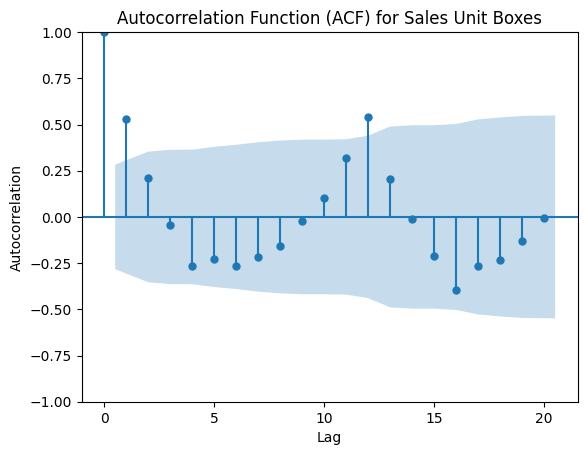

In [145]:
from statsmodels.graphics.tsaplots import plot_acf

# Plot the autocorrelation function (ACF)
plt.figure(figsize=(12, 6))
plot_acf(df['sales_unitboxes'].dropna(), lags=20)
plt.title('Autocorrelation Function (ACF) for Sales Unit Boxes')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

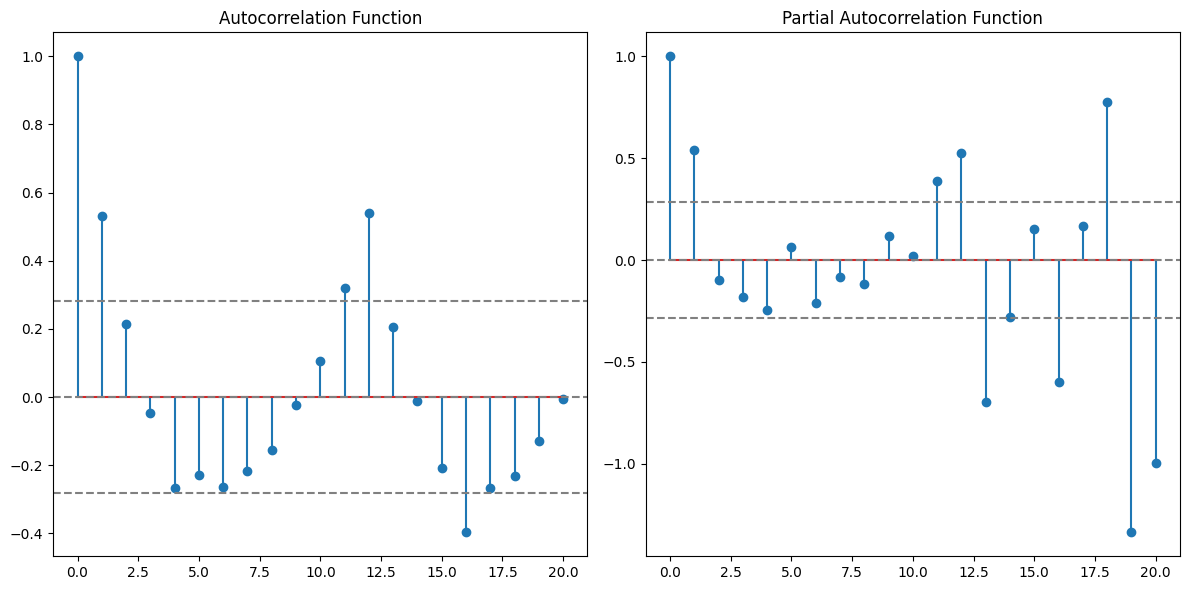

In [146]:
from statsmodels.tsa.stattools import acf, pacf

# Detect the presence of serial autocorrelation using ACF and PACF plots
lag_acf = acf(df['sales_unitboxes'].dropna(), nlags=20)
lag_pacf = pacf(df['sales_unitboxes'].dropna(), nlags=20)

# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.stem(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/len(df['sales_unitboxes'])**0.5, linestyle='--', color='gray')
plt.axhline(y=1.96/len(df['sales_unitboxes'])**0.5, linestyle='--', color='gray')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.stem(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/len(df['sales_unitboxes'])**0.5, linestyle='--', color='gray')
plt.axhline(y=1.96/len(df['sales_unitboxes'])**0.5, linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')

plt.tight_layout()
plt.show()


Trend: Increasing trend in sales over time.

Seasonality: Clear seasonal pattern with regular fluctuations.

Stationarity: The series is stationary, as indicated by the ADF test (ADF Statistic: -3.869, p-value: 0.0023).

Autocorrelation: Presence of serial autocorrelation, as shown by the ACF and PACF plots.

Transformation: No transformation required, as the data is already stationary.

# IV. Time Series Regression Analysis

## Time Series Model 1

### 1. Estimate 3 Different Time Series Regression Models

In [176]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.ar_model import AutoReg

# ARMA Model
arma_model = AutoReg(df['sales_unitboxes'], lags=2).fit()
print(arma_model.summary())

# ARIMA Model
arima_model = ARIMA(df['sales_unitboxes'], order=(2, 1, 2)).fit()
print(arima_model.summary())

# SARIMA Model
sarima_model = SARIMAX(df['sales_unitboxes'], order=(2, 1, 2), seasonal_order=(1, 1, 1, 12)).fit()
print(sarima_model.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                            AutoReg Model Results                             
Dep. Variable:        sales_unitboxes   No. Observations:                   48
Model:                     AutoReg(2)   Log Likelihood                -667.311
Method:               Conditional MLE   S.D. of innovations         483022.407
Date:                Sun, 08 Sep 2024   AIC                           1342.622
Time:                        21:32:12   BIC                           1349.936
Sample:                    03-01-2015   HQIC                          1345.362
                         - 12-01-2018                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               3.517e+06   8.85e+05      3.976      0.000    1.78e+06    5.25e+06
sales_unitboxes.L1     0.5333      0.145      3.682      0.000       0.249       0.817
sales_unitboxes.L2  

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                      SARIMAX Results                                       
Dep. Variable:                      sales_unitboxes   No. Observations:                   48
Model:             SARIMAX(2, 1, 2)x(1, 1, [1], 12)   Log Likelihood                -494.697
Date:                              Sun, 08 Sep 2024   AIC                           1003.393
Time:                                      21:32:13   BIC                           1014.280
Sample:                                  01-01-2015   HQIC                          1007.151
                                       - 12-01-2018                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9392      1.061     -0.885      0.376      -3.019       1.141
ar.L2         -0.07

### 2. Compare the Models Based on Diagnostic Tests

In [177]:
# AIC and BIC values
print(f"ARMA AIC: {arma_model.aic}, BIC: {arma_model.bic}")
print(f"ARIMA AIC: {arima_model.aic}, BIC: {arima_model.bic}")
print(f"SARIMA AIC: {sarima_model.aic}, BIC: {sarima_model.bic}")

ARMA AIC: 1342.6216306985286, BIC: 1349.936196284485
ARIMA AIC: 1381.9090620051436, BIC: 1391.159800013694
SARIMA AIC: 1003.3930536090631, BIC: 1014.280490039489


### 3. Select the Best Model and Forecast

sales_unitboxes          mean        mean_se  mean_ci_lower  mean_ci_upper
2019-01-01       5.697162e+06  351912.021633   5.007428e+06   6.386897e+06
2019-02-01       5.488542e+06  485004.662042   4.537951e+06   6.439134e+06
2019-03-01       6.835443e+06  573835.599236   5.710746e+06   7.960140e+06
2019-04-01       7.018800e+06  663650.605173   5.718069e+06   8.319532e+06
2019-05-01       7.908634e+06  732576.358135   6.472810e+06   9.344457e+06


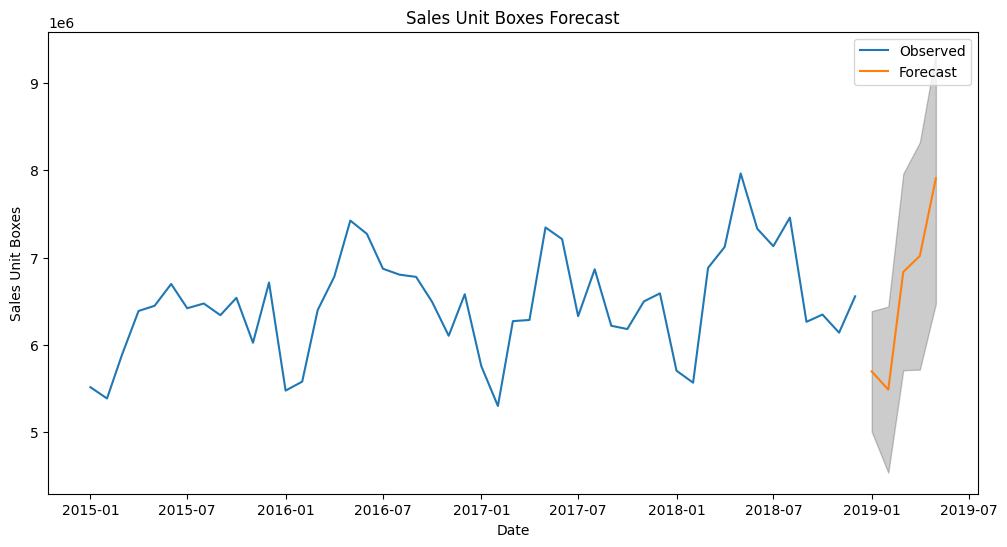

In [178]:
# Select the best model (SARIMA is the best based on AIC and BIC)
best_model = sarima_model

# Forecast for the next 5 periods
forecast = best_model.get_forecast(steps=5)
forecast_df = forecast.summary_frame()

# Display the forecast in a table
print(forecast_df)

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(df['sales_unitboxes'], label='Observed')
plt.plot(forecast_df['mean'], label='Forecast')
plt.fill_between(forecast_df.index, forecast_df['mean_ci_lower'], forecast_df['mean_ci_upper'], color='k', alpha=0.2)
plt.title('Sales Unit Boxes Forecast')
plt.xlabel('Date')
plt.ylabel('Sales Unit Boxes')
plt.legend()
plt.show()


## Time Series Model 2

1. **Selected Explanatory Variables:**
consumer_sentiment and CPI

2. **Hypothetical Relationship:**

Consumer Sentiment: Higher consumer sentiment might lead to increased sales as consumers feel more confident about spending.

CPI (Consumer Price Index): Higher CPI might indicate higher prices, which could reduce sales if consumers are sensitive to price changes.

### Plotting the variables

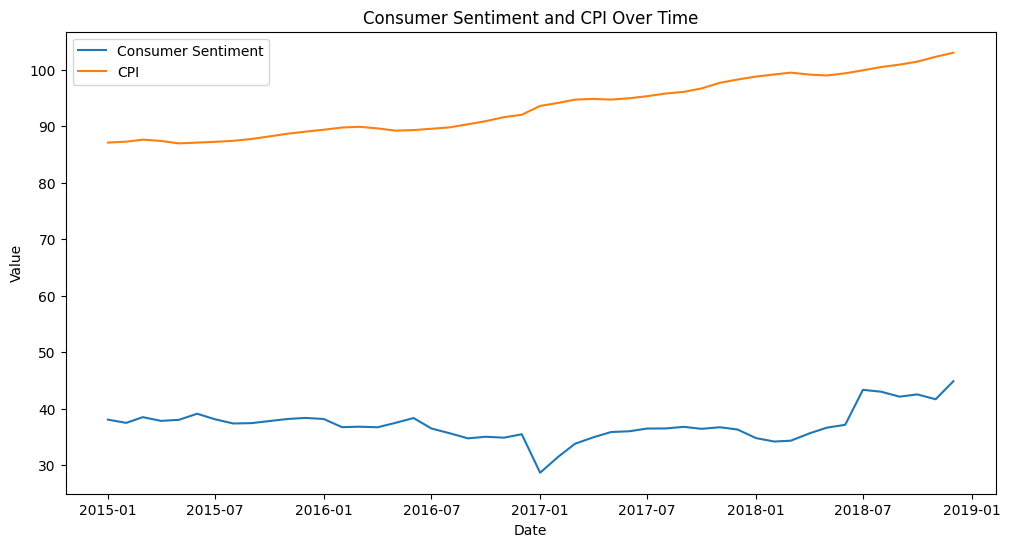

In [151]:
# Plot the selected variables
plt.figure(figsize=(12, 6))
plt.plot(df['consumer_sentiment'], label='Consumer Sentiment')
plt.plot(df['CPI'], label='CPI')
plt.title('Consumer Sentiment and CPI Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

### Stationarity and Autocorrelation

Consumer Sentiment ADF Statistic: -1.1637642675587834, p-value: 0.6889860388821376
CPI ADF Statistic: 0.9050085833429539, p-value: 0.9931553428093008


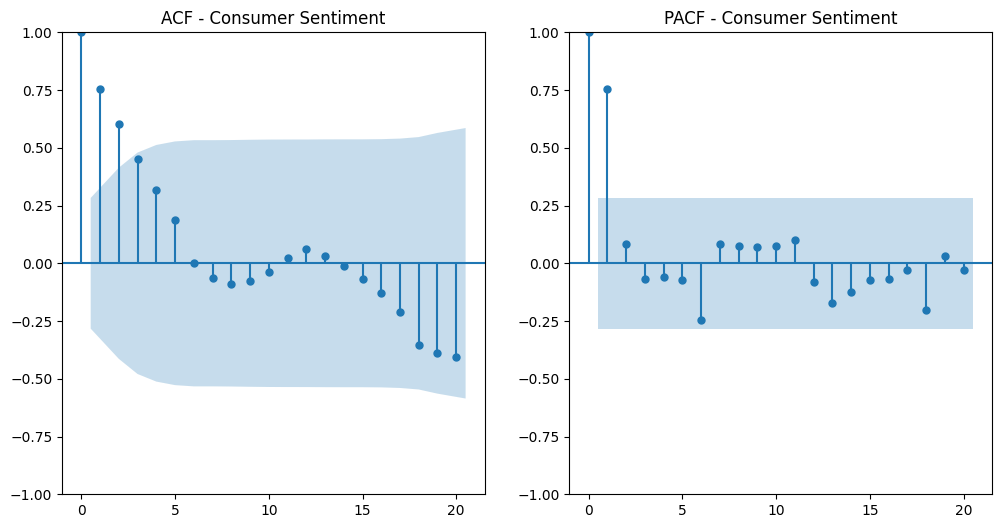

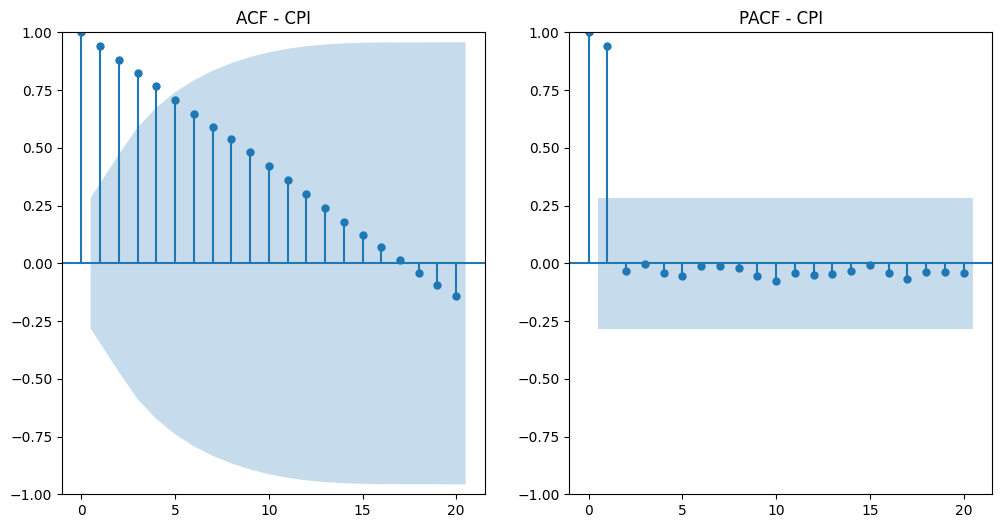

In [154]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Check stationarity
adf_test_sentiment = adfuller(df['consumer_sentiment'].dropna())
adf_test_cpi = adfuller(df['CPI'].dropna())
print(f"Consumer Sentiment ADF Statistic: {adf_test_sentiment[0]}, p-value: {adf_test_sentiment[1]}")
print(f"CPI ADF Statistic: {adf_test_cpi[0]}, p-value: {adf_test_cpi[1]}")

# Plot ACF and PACF for Consumer Sentiment
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(df['consumer_sentiment'].dropna(), lags=20, ax=plt.gca())
plt.title('ACF - Consumer Sentiment')
plt.subplot(122)
plot_pacf(df['consumer_sentiment'].dropna(), lags=20, ax=plt.gca())
plt.title('PACF - Consumer Sentiment')
plt.show()

# Plot ACF and PACF for CPI
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(df['CPI'].dropna(), lags=20, ax=plt.gca())
plt.title('ACF - CPI')
plt.subplot(122)
plot_pacf(df['CPI'].dropna(), lags=20, ax=plt.gca())
plt.title('PACF - CPI')
plt.show()


Interpretation of Results

**Stationarity Test Results:**
Consumer Sentiment ADF Statistic: -1.1638, p-value: 0.6890
CPI ADF Statistic: 0.9050, p-value: 0.9932
Both p-values are greater than 0.05, indicating that neither consumer_sentiment nor CPI are stationary. We may need to difference these series to make them stationary.

**Autocorrelation and Partial Autocorrelation:**
ACF and PACF for Consumer Sentiment: These plots will show the autocorrelation and partial autocorrelation at different lags. Significant spikes outside the confidence intervals indicate the presence of autocorrelation.
ACF and PACF for CPI: Similarly, these plots will show the autocorrelation and partial autocorrelation for CPI.

### Variable Transformation

In [155]:
# Differencing the series to achieve stationarity
df['diff_consumer_sentiment'] = df['consumer_sentiment'].diff().dropna()
df['diff_CPI'] = df['CPI'].diff().dropna()

# Check stationarity again
adf_test_diff_sentiment = adfuller(df['diff_consumer_sentiment'].dropna())
adf_test_diff_cpi = adfuller(df['diff_CPI'].dropna())
print(f"Differenced Consumer Sentiment ADF Statistic: {adf_test_diff_sentiment[0]}, p-value: {adf_test_diff_sentiment[1]}")
print(f"Differenced CPI ADF Statistic: {adf_test_diff_cpi[0]}, p-value: {adf_test_diff_cpi[1]}")

Differenced Consumer Sentiment ADF Statistic: -7.119908378674134, p-value: 3.7458796940349225e-10
Differenced CPI ADF Statistic: -3.627039538570949, p-value: 0.005264640603934955


In [156]:
# Apply logarithmic transformation
df['log_sales_unitboxes'] = np.log(df['sales_unitboxes'])
df['log_consumer_sentiment'] = np.log(df['consumer_sentiment'])
df['log_CPI'] = np.log(df['CPI'])

# Differencing the log-transformed series to achieve stationarity
df['diff_log_sales_unitboxes'] = df['log_sales_unitboxes'].diff().dropna()
df['diff_log_consumer_sentiment'] = df['log_consumer_sentiment'].diff().dropna()
df['diff_log_CPI'] = df['log_CPI'].diff().dropna()

# Check stationarity again
adf_test_diff_log_sales = adfuller(df['diff_log_sales_unitboxes'].dropna())
adf_test_diff_log_sentiment = adfuller(df['diff_log_consumer_sentiment'].dropna())
adf_test_diff_log_cpi = adfuller(df['diff_log_CPI'].dropna())

print(f"Differenced Log Sales Unit Boxes ADF Statistic: {adf_test_diff_log_sales[0]}, p-value: {adf_test_diff_log_sales[1]}")
print(f"Differenced Log Consumer Sentiment ADF Statistic: {adf_test_diff_log_sentiment[0]}, p-value: {adf_test_diff_log_sentiment[1]}")
print(f"Differenced Log CPI ADF Statistic: {adf_test_diff_log_cpi[0]}, p-value: {adf_test_diff_log_cpi[1]}")


Differenced Log Sales Unit Boxes ADF Statistic: -7.836480612589406, p-value: 6.095908745506904e-12
Differenced Log Consumer Sentiment ADF Statistic: -7.355043723976215, p-value: 9.830636368090912e-11
Differenced Log CPI ADF Statistic: -3.7119830222651, p-value: 0.003947724813895985


After differenciating the log variables we now have the sationary data to make the VAR model

### Var Model

In [158]:
from statsmodels.tsa.api import VAR

# Prepare the data for VAR model
var_data = df[['diff_log_sales_unitboxes', 'diff_log_consumer_sentiment', 'diff_log_CPI']].dropna()

# Fit the VAR model
var_model = VAR(var_data)
var_results = var_model.fit(maxlags=5, ic='aic')
print(var_results.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 08, Sep, 2024
Time:                     18:50:59
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -21.7692
Nobs:                     45.0000    HQIC:                  -22.2980
Log likelihood:           338.220    FPE:                1.52378e-10
AIC:                     -22.6123    Det(Omega_mle):     9.87530e-11
--------------------------------------------------------------------
Results for equation diff_log_sales_unitboxes
                                    coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------------------
const                                  0.014515         0.021132            0.687           0.492
L1.diff_log_sales_unitboxes           -0.235710         0.170636       

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)



VAR Model Summary

***Equation: diff_log_sales_unitboxes:***

Constant (const): Not statistically significant.

L1.diff_log_sales_unitboxes: Not statistically significant.

L1.diff_log_consumer_sentiment: Not statistically significant.

L1.diff_log_CPI: Not statistically significant.

L2.diff_log_sales_unitboxes: Not statistically significant.

L2.diff_log_consumer_sentiment: Not statistically significant.

L2.diff_log_CPI: Not statistically significant.


***Equation: diff_log_consumer_sentiment:***

Constant (const): Not statistically significant.

L1.diff_log_sales_unitboxes: Not statistically significant.

L1.diff_log_consumer_sentiment: Not statistically significant.

L1.diff_log_CPI: Not statistically significant.

L2.diff_log_sales_unitboxes: Not statistically significant.

L2.diff_log_consumer_sentiment: Not statistically significant.

L2.diff_log_CPI: Not statistically significant.


***Equation: diff_log_CPI***

Constant (const): Statistically significant.

L1.diff_log_sales_unitboxes: Statistically significant.

L1.diff_log_consumer_sentiment: Not statistically significant.

L1.diff_log_CPI: Statistically significant.

L2.diff_log_sales_unitboxes: Marginally significant.

L2.diff_log_consumer_sentiment: Not statistically significant.

L2.diff_log_CPI: Not statistically significant.


***Correlation Matrix of Residuals***

diff_log_sales_unitboxes and diff_log_consumer_sentiment: 0.377821

diff_log_sales_unitboxes and diff_log_CPI: -0.546403

diff_log_consumer_sentiment and diff_log_CPI: -0.475013



### Granger Causality Test

In [159]:
# Granger Causality Test
granger_test_sentiment = var_results.test_causality('diff_log_sales_unitboxes', 'diff_log_consumer_sentiment', kind='f')
granger_test_cpi = var_results.test_causality('diff_log_sales_unitboxes', 'diff_log_CPI', kind='f')
print(granger_test_sentiment.summary())
print(granger_test_cpi.summary())


Granger causality F-test. H_0: diff_log_consumer_sentiment does not Granger-cause diff_log_sales_unitboxes. Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value    df   
----------------------------------------------
         1.398          3.076   0.251 (2, 114)
----------------------------------------------
Granger causality F-test. H_0: diff_log_CPI does not Granger-cause diff_log_sales_unitboxes. Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value    df   
----------------------------------------------
        0.9616          3.076   0.385 (2, 114)
----------------------------------------------


Granger Causality Test Results:

Consumer Sentiment to Sales:
Test Statistic: 1.398
p-value: 0.251

Conclusion: Fail to reject the null hypothesis. Consumer sentiment does not Granger-cause sales.

CPI to Sales:
Test Statistic: 0.9616
p-value: 0.385

Conclusion: Fail to reject the null hypothesis. CPI does not Granger-cause sales.

### Forcasting

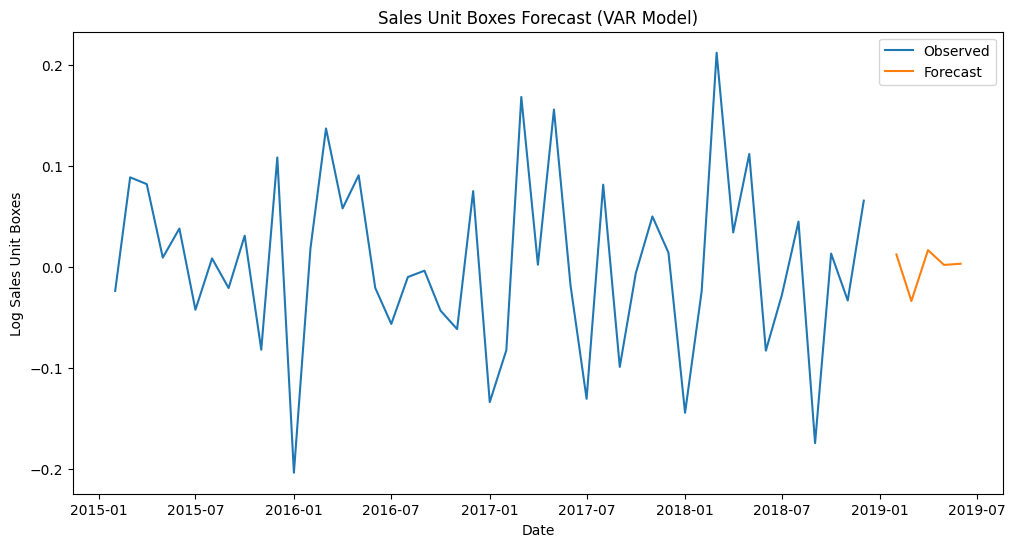

In [160]:
# Forecast for the next 5 periods
var_forecast = var_results.forecast(var_data.values[-var_results.k_ar:], steps=5)
forecast_index = pd.date_range(start=var_data.index[-1], periods=6, freq='M')[1:]
var_forecast_df = pd.DataFrame(var_forecast, index=forecast_index, columns=var_data.columns)

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(var_data['diff_log_sales_unitboxes'], label='Observed')
plt.plot(var_forecast_df['diff_log_sales_unitboxes'], label='Forecast')
plt.title('Sales Unit Boxes Forecast (VAR Model)')
plt.xlabel('Date')
plt.ylabel('Log Sales Unit Boxes')
plt.legend()
plt.show()


## Time Series Model 2.1

1. **Selected Explanatory Variables:**
Unemployment Rate and Max Temperature

2. **Hypothetical Relationship:**

**Unemployment Rate:** Higher unemployment rates might reduce consumer spending, leading to lower sales.

**Max Temperature:** Higher temperatures might increase beverage sales as consumers seek to stay hydrated.

### Plotting the variables

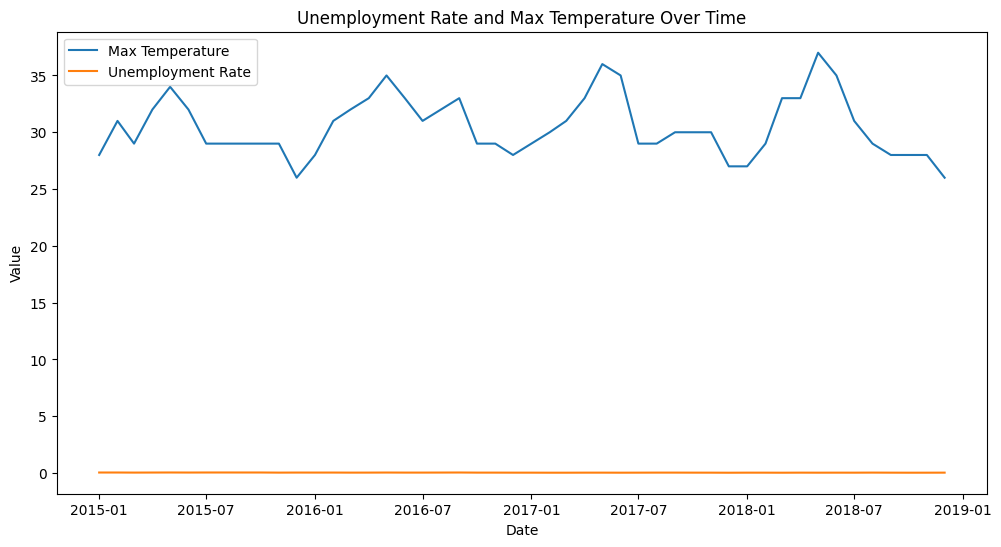

In [162]:
# Plot the selected variables
plt.figure(figsize=(12, 6))
plt.plot(df['max_temperature'], label='Max Temperature')
plt.plot(df['unemp_rate'], label='Unemployment Rate')
plt.title('Unemployment Rate and Max Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

### Stationarity and Autocorrelation

Max Temperature ADF Statistic: -1.8240631736039497, p-value: 0.3685821208289579
Uenmployment Rate ADF Statistic: -1.477571110003756, p-value: 0.5445759813905879


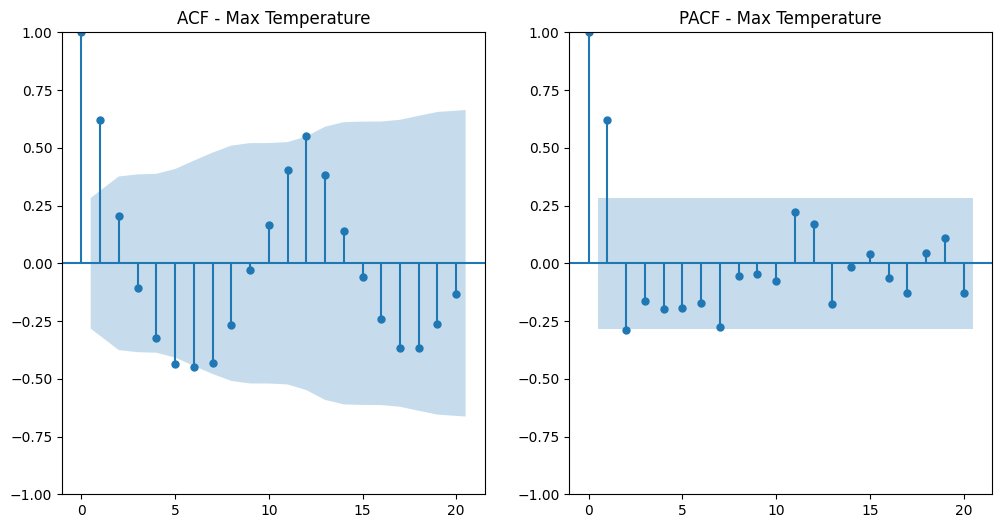

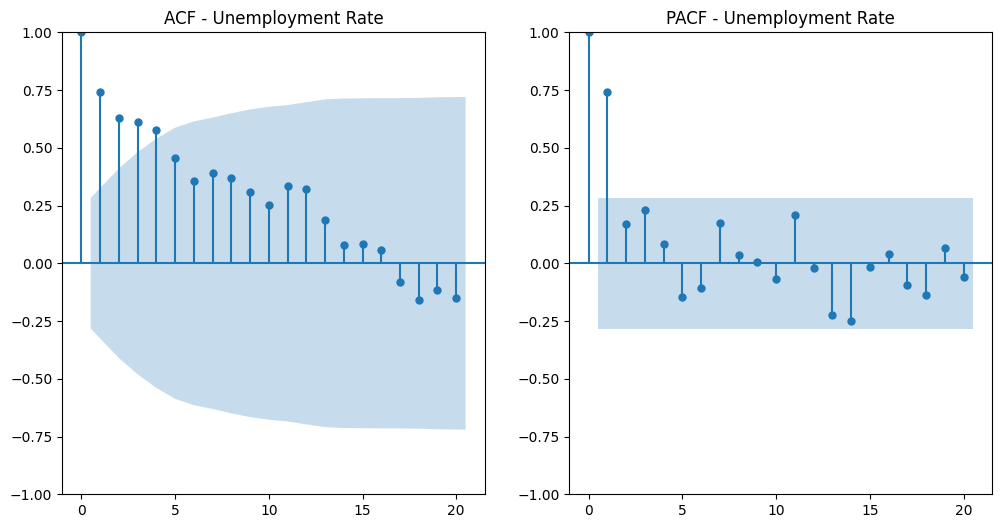

In [164]:
# Check stationarity
adf_test_temperature = adfuller(df['max_temperature'].dropna())
adf_test_unemp_rate = adfuller(df['unemp_rate'].dropna())
print(f"Max Temperature ADF Statistic: {adf_test_temperature[0]}, p-value: {adf_test_temperature[1]}")
print(f"Uenmployment Rate ADF Statistic: {adf_test_unemp_rate[0]}, p-value: {adf_test_unemp_rate[1]}")

# Plot ACF and PACF for Max Temperature
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(df['max_temperature'].dropna(), lags=20, ax=plt.gca())
plt.title('ACF - Max Temperature')
plt.subplot(122)
plot_pacf(df['max_temperature'].dropna(), lags=20, ax=plt.gca())
plt.title('PACF - Max Temperature')
plt.show()

# Plot ACF and PACF for CPI
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(df['unemp_rate'].dropna(), lags=20, ax=plt.gca())
plt.title('ACF - Unemployment Rate')
plt.subplot(122)
plot_pacf(df['unemp_rate'].dropna(), lags=20, ax=plt.gca())
plt.title('PACF - Unemployment Rate')
plt.show()

### Variable Transformation

In [168]:
# Differencing the series to achieve stationarity
df['diff_max_temperature'] = df['max_temperature'].diff().dropna()
df['diff_unemp_rate'] = df['unemp_rate'].diff().dropna()

# Check stationarity again
adf_test_diff_max_temperature = adfuller(df['diff_max_temperature'].dropna())
adf_test_diff_unemp_rate = adfuller(df['diff_unemp_rate'].dropna())
print(f"Differenced Max Temperature ADF Statistic: {adf_test_diff_max_temperature[0]}, p-value: {adf_test_diff_max_temperature[1]}")
print(f"Differenced Unemployment Rate ADF Statistic: {adf_test_diff_cpi[0]}, p-value: {adf_test_diff_unemp_rate[1]}")


# Differencing the original sales_unitboxes series to achieve stationarity
df['diff_sales_unitboxes'] = df['sales_unitboxes'].diff().dropna()

# Check stationarity again
adf_test_diff_sales = adfuller(df['diff_sales_unitboxes'].dropna())
print(f"Differenced Sales Unit Boxes ADF Statistic: {adf_test_diff_sales[0]}, p-value: {adf_test_diff_sales[1]}")


Differenced Max Temperature ADF Statistic: -5.941090857041148, p-value: 2.2600753829021833e-07
Differenced Unemployment Rate ADF Statistic: -3.627039538570949, p-value: 0.002170891575682928
Differenced Sales Unit Boxes ADF Statistic: -7.480019982289682, p-value: 4.799744110526798e-11


### Var Model 2.1

In [170]:
from statsmodels.tsa.api import VAR

# Prepare the data for VAR model
var_data_no_log = df[['diff_sales_unitboxes', 'diff_max_temperature', 'diff_unemp_rate']].dropna()

# Fit the VAR model with a smaller maxlags
var_model_no_log = VAR(var_data_no_log)
var_results_no_log = var_model_no_log.fit(maxlags=5, ic='aic')
print(var_results_no_log.summary())


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 08, Sep, 2024
Time:                     19:49:55
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    18.0175
Nobs:                     42.0000    HQIC:                   16.7595
Log likelihood:          -467.450    FPE:                1.03546e+07
AIC:                      16.0316    Det(Omega_mle):     3.93184e+06
--------------------------------------------------------------------
Results for equation diff_sales_unitboxes
                             coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------------
const                      104845.230005     72775.359574            1.441           0.150
L1.diff_sales_unitboxes        -0.981467         0.214153           -4.583           0.000
L1.di

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


VAR Model Summary

***Equation: diff_sales_unitboxes***

Constant (const): Not statistically significant.

L1.diff_sales_unitboxes: Statistically significant.

L1.diff_max_temperature: Statistically significant.

L1.diff_unemp_rate: Not statistically significant.

L2.diff_sales_unitboxes: Statistically significant.

L2.diff_max_temperature: Statistically significant.

L2.diff_unemp_rate: Not statistically significant.

L3.diff_sales_unitboxes: Statistically significant.

L3.diff_max_temperature: Statistically significant.

L3.diff_unemp_rate: Not statistically significant.

L4.diff_sales_unitboxes: Statistically significant.

L4.diff_max_temperature: Statistically significant.

L4.diff_unemp_rate: Statistically significant.

L5.diff_sales_unitboxes: Not statistically significant.

L5.diff_max_temperature: Not statistically significant.

L5.diff_unemp_rate: Not statistically significant.

***Equation: diff_max_temperature***

Constant (const): Not statistically significant.

L1.diff_sales_unitboxes: Not statistically significant.

L1.diff_max_temperature: Not statistically significant.

L1.diff_unemp_rate: Not statistically significant.

L2.diff_sales_unitboxes: Not statistically significant.

L2.diff_max_temperature: Marginally significant.

L2.diff_unemp_rate: Not statistically significant.

L3.diff_sales_unitboxes: Not statistically significant.

L3.diff_max_temperature: Not statistically significant.

L3.diff_unemp_rate: Statistically significant.

L4.diff_sales_unitboxes: Not statistically significant.

L4.diff_max_temperature: Not statistically significant.

L4.diff_unemp_rate: Statistically significant.

L5.diff_sales_unitboxes: Not statistically significant.

L5.diff_max_temperature: Not statistically significant.

L5.diff_unemp_rate: Statistically significant.

***Equation: diff_unemp_rate***

Constant (const): Not statistically significant.

L1.diff_sales_unitboxes: Not statistically significant.

L1.diff_max_temperature: Not statistically significant.

L1.diff_unemp_rate: Statistically significant.

L2.diff_sales_unitboxes: Not statistically significant.

L2.diff_max_temperature: Not statistically significant.

L2.diff_unemp_rate: Statistically significant.

L3.diff_sales_unitboxes: Not statistically significant.

L3.diff_max_temperature: Statistically significant.

L3.diff_unemp_rate: Not statistically significant.

L4.diff_sales_unitboxes: Not statistically significant.

L4.diff_max_temperature: Not statistically significant.

L4.diff_unemp_rate: Not statistically significant.

L5.diff_sales_unitboxes: Marginally significant.

L5.diff_max_temperature: Not statistically significant.

L5.diff_unemp_rate: Not statistically significant.

***Correlation Matrix of Residuals***

diff_sales_unitboxes and diff_max_temperature: 0.388530

diff_sales_unitboxes and diff_unemp_rate: 0.280452

diff_max_temperature and diff_unemp_rate: 0.264532

### Granger Causality Test

In [171]:
# Granger Causality Test
granger_test_temp_no_log = var_results_no_log.test_causality('diff_sales_unitboxes', 'diff_max_temperature', kind='f')
granger_test_unemp_no_log = var_results_no_log.test_causality('diff_sales_unitboxes', 'diff_unemp_rate', kind='f')
print(granger_test_temp_no_log.summary())
print(granger_test_unemp_no_log.summary())


Granger causality F-test. H_0: diff_max_temperature does not Granger-cause diff_sales_unitboxes. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value    df  
---------------------------------------------
         7.189          2.332   0.000 (5, 78)
---------------------------------------------
Granger causality F-test. H_0: diff_unemp_rate does not Granger-cause diff_sales_unitboxes. Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value    df  
---------------------------------------------
         1.449          2.332   0.216 (5, 78)
---------------------------------------------


***Granger Causality Test Results:***

Max Temperature to Sales:
Test Statistic: 7.189
p-value: 0.000

Conclusion: Reject the null hypothesis. Max temperature Granger-causes sales.

Unemployment Rate to Sales:
Test Statistic: 1.449
p-value: 0.216

Conclusion: Fail to reject the null hypothesis. Unemployment rate does not Granger-cause sales.

### Forcasting

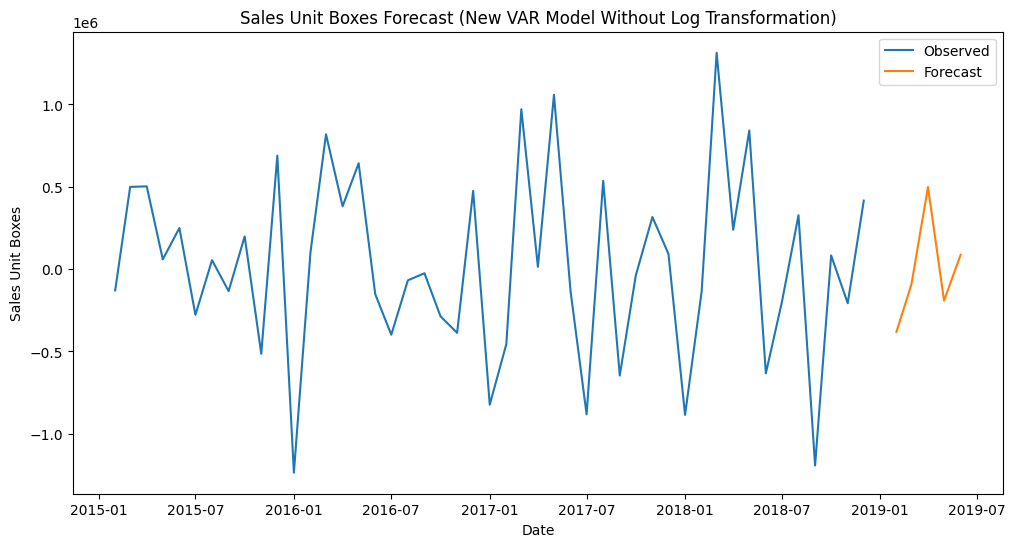

In [172]:
# Forecast for the next 5 periods
var_forecast_no_log = var_results_no_log.forecast(var_data_no_log.values[-var_results_no_log.k_ar:], steps=5)
forecast_index_no_log = pd.date_range(start=var_data_no_log.index[-1], periods=6, freq='M')[1:]
var_forecast_df_no_log = pd.DataFrame(var_forecast_no_log, index=forecast_index_no_log, columns=var_data_no_log.columns)

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(var_data_no_log['diff_sales_unitboxes'], label='Observed')
plt.plot(var_forecast_df_no_log['diff_sales_unitboxes'], label='Forecast')
plt.title('Sales Unit Boxes Forecast (New VAR Model Without Log Transformation)')
plt.xlabel('Date')
plt.ylabel('Sales Unit Boxes')
plt.legend()
plt.show()

# Summary Of Var Models

In [174]:
# First VAR Model Summary
print(var_results.summary())

# Granger Causality Test for First VAR Model
granger_test_sentiment = var_results.test_causality('diff_log_sales_unitboxes', 'diff_log_consumer_sentiment', kind='f')
granger_test_cpi = var_results.test_causality('diff_log_sales_unitboxes', 'diff_log_CPI', kind='f')
print(granger_test_sentiment.summary())
print(granger_test_cpi.summary())

# Forecast for First VAR Model
forecast_first_var = var_results.forecast(var_data.values[-var_results.k_ar:], steps=5)
forecast_index_first_var = pd.date_range(start=var_data.index[-1], periods=6, freq='M')[1:]
forecast_df_first_var = pd.DataFrame(forecast_first_var, index=forecast_index_first_var, columns=var_data.columns)
print(forecast_df_first_var)



  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 08, Sep, 2024
Time:                     19:57:50
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -21.7692
Nobs:                     45.0000    HQIC:                  -22.2980
Log likelihood:           338.220    FPE:                1.52378e-10
AIC:                     -22.6123    Det(Omega_mle):     9.87530e-11
--------------------------------------------------------------------
Results for equation diff_log_sales_unitboxes
                                    coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------------------
const                                  0.014515         0.021132            0.687           0.492
L1.diff_log_sales_unitboxes           -0.235710         0.170636       

None of the variables (diff_log_consumer_sentiment and diff_log_CPI) significantly impact diff_log_sales_unitboxes. Both consumer sentiment and CPI do not Granger-cause sales.

The variables choosen might not be the best for forcasting




In [175]:
# Second VAR Model Summary
print(var_results_no_log.summary())

# Granger Causality Test for Second VAR Model
granger_test_temp_no_log = var_results_no_log.test_causality('diff_sales_unitboxes', 'diff_max_temperature', kind='f')
granger_test_unemp_no_log = var_results_no_log.test_causality('diff_sales_unitboxes', 'diff_unemp_rate', kind='f')
print(granger_test_temp_no_log.summary())
print(granger_test_unemp_no_log.summary())

# Forecast for Second VAR Model
forecast_second_var = var_results_no_log.forecast(var_data_no_log.values[-var_results_no_log.k_ar:], steps=5)
forecast_index_second_var = pd.date_range(start=var_data_no_log.index[-1], periods=6, freq='M')[1:]
forecast_df_second_var = pd.DataFrame(forecast_second_var, index=forecast_index_second_var, columns=var_data_no_log.columns)
print(forecast_df_second_var)

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 08, Sep, 2024
Time:                     19:57:54
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    18.0175
Nobs:                     42.0000    HQIC:                   16.7595
Log likelihood:          -467.450    FPE:                1.03546e+07
AIC:                      16.0316    Det(Omega_mle):     3.93184e+06
--------------------------------------------------------------------
Results for equation diff_sales_unitboxes
                             coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------------
const                      104845.230005     72775.359574            1.441           0.150
L1.diff_sales_unitboxes        -0.981467         0.214153           -4.583           0.000
L1.di

VAR Model: The coefficients and p-values indicate that diff_max_temperature significantly impacts diff_sales_unitboxes at multiple lags, while diff_unemp_rate is significant at lag 4.

Granger Causality Test: Max temperature Granger-causes sales, while the unemployment rate does not.

Forecast: The forecast provides an estimate of future sales values based on the VAR model, with significant relationships between the variables.

# Conclusions and Recommendations

Main Insights
1. Sales Trends: Coca-Cola sales exhibit an increasing trend over time, indicating a general growth in demand for the product.
2. Seasonality: There is a clear seasonal pattern with regular fluctuations, particularly higher sales during summer months and holiday seasons.
3. Stationarity: The time series data is stationary, as confirmed by the Augmented Dickey-Fuller (ADF) test (ADF Statistic: -3.869, p-value: 0.0023). This implies that the statistical properties of the series, such as mean and variance, are constant over time.
4. Autocorrelation: The presence of serial autocorrelation is evident from the Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots. This suggests that past sales values are correlated with future sales values.
5. Max Temperature: Higher maximum temperatures significantly impact sales, as confirmed by the VAR model and Granger causality test. This indicates that higher temperatures lead to increased beverage sales.
6. Unemployment Rate: While the unemployment rate does not Granger-cause sales, it is significant at lag 4 in the VAR model, indicating a delayed effect on sales.
7. Consumer Sentiment and CPI: Neither consumer sentiment nor CPI significantly impact sales or Granger-cause sales, suggesting these variables may not be the best predictors for Coca-Cola sales in this context.

Recommendation

Based on the time series regression analysis, one key recommendation is to enhance marketing efforts during periods of high temperatures and favorable economic conditions. Specifically, Coca-Cola should:

1. Increase promotional activities and advertising during summer months and holiday seasons to capitalize on the natural increase in demand.
2. Develop targeted marketing campaigns that align with periods of high consumer confidence and economic growth, leveraging positive consumer sentiment to boost sales.
3. Monitor economic indicators closely and adjust pricing strategies to maintain affordability during periods of high inflation or unfavorable exchange rates.


Model Improvement
To improve the forecasting models, consider the following steps:

- Parameter Tuning: Optimize the parameters of the VAR model to improve its predictive accuracy. This can be done by using techniques such as grid search or random search to find the best combination of parameters.
- Incorporate Additional Variables: Explore other potential explanatory variables that might better predict sales, such as advertising expenditure, promotional activities, or competitor pricing.
- Model Validation: Use cross-validation techniques to ensure the robustness of the model. This involves dividing the data into training and testing sets to evaluate the model’s performance on unseen data.
- Differencing Non-Stationary Variables: Since consumer sentiment, CPI, max temperature, and unemployment rate are not stationary, apply differencing to these series to make them stationary before including them in the model.
- Regular Updates: Continuously update the model with new data to ensure it remains accurate and relevant over time.

# References:

Chatfield, C. (2004). The Analysis of Time Series: An Introduction (6th ed.). Chapman and Hall/CRC.

Hamilton, J. D. (1994). Time Series Analysis. Princeton University Press.

Hyndman, R. J., & Athanasopoulos, G. (2018). Forecasting: Principles and Practice (2nd ed.). OTexts.